<a href="https://colab.research.google.com/github/amrollins/Machine_Learning_Course/blob/main/in_class/03_Group1_Kodatt_Rollins_Yong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands On Exercise 3: Decision Trees

**Chapter 6 – Decision Trees**

File name convention: For group 42 and memebers Richard Stallman and <br>
Linus Torvalds it would be <br>
"03_Goup42_Stallman_Torvalds.pdf".

Submission via blackboard (UA).

Feel free to answer free text questions in text cells using markdown <br> and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not <br>
intended for you to try to understand every line of code.   <br>
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Loading the data

You might remember the [Iris Flower Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set) from last lecture. If <br>
you're curious about the data set, feel free to check out the wikipedia <br>
article in the hotlink listed here. Basically, it contains information <br>
about several species of iris flowers along with a classification of <br>
which species of iris they are.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [ ]:
X.shape  # 150 instances, 2 features per instance (petal length and width)

(150, 2)

In [ ]:
y.shape

(150,)

Now that we have the data we can fit a model to it.

# Decision Trees for Classification

At their core, **decision trees are branching networks** that take data and <br>
pose a series of rules-based questions at each branching point in the <br>
tree. **A branch might look like the following: if the number is greater** <br>
**two, take the left branch. Otherwise, take the right branch**. The idea is <br>
to **construct a network of these rules-based conditions that**, when <br>
imposed on your input data, **get you to a desired output**.

### Task 1

Build a simple [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `max_depth` of 2 and <br>
`random_state` of 42. Fit to the data `X`, `y`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

### Visualization of the Decision Tree

In the following, we use the `graphviz` package to visualize  <br>
decision trees in the form of flowcharts.

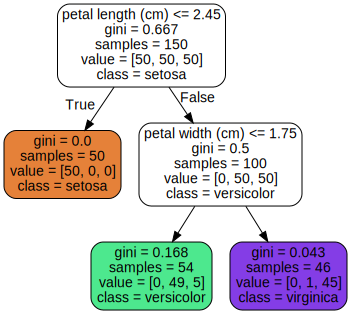

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

IMAGES_PATH = os.path.join(".", "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

**Don't worry about understanding the following code but do try to** <br>
**understand the plot itself**. This isn't the first time we've looked at <br>
plots of decision boundaries before. Reminder, a decision boundary is <br>
some cutoff point we determine within the data that separates one <br>
classification from another.

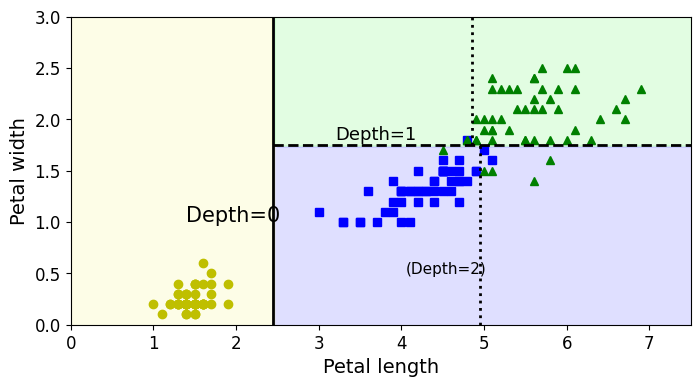

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## Predicting classes and class probabilities

### Task 2
Next, predict the probabilities and the class for the following values: <br>
``` X=[[5, 1.5]] ``` for petal length and petal width.

You will need the functions `tree_clf.predict_proba()` and <br>
`tree_clf.predict()`. You do not need to import these as these are <br>
functions already included with your decision tree classifier.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
pred_prob = tree_clf.predict_proba(X=[[5, 1.5]])
pred_prob

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
y_pred = tree_clf.predict(X=[[5, 1.5]])
y_pred

array([1])

:↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this
The fitted decision tree classified a petal length of 5 and petal width of 1.5 as class 1 (Iris versicolor), with a probability confidence of 0.9074.

You can also check in the plot above what class you would put the instance <br> `X=[[5, 1.5]]` into.
In the plot, yellow corresponds to class 0 (Iris setosa), blue <br> corresponds to class 1 (Iris versicolor), and green corresponds to class <br> 2 (Iris virginica).

## Sensitivity to training set details

### Task 3
Next, we want to explore the sensitivity to the training set details. <br>
We will train the same decision tree model, but with slightly different <br>
training data.


**Task 3a (bonus)**: The statements in the next two cells are the same. <br>
For bonus points you can explain why that's the case.

Hint: refer to the [dataset description](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
and think about the slicing of the <br>
array below. Which values are selected and which data do they show? It <br>
helps to evaluate parts of the expression separately and try to <br>
understand them.

In [ ]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [ ]:
X[(X[:, 1]==[1.8]) & (y==1)]

array([[4.8, 1.8]])

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your answer goes below

Task 3a (bonus) answer: This picks out the data ponit that will incorrectly be classified as virginica when it is actually a versicolor.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

**Task 3b**: Now, what if we select the values that are NOT <br>
1.8. Which data would the dataset represent?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 3b answer: This represents the dataset without that particular point.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

In [ ]:
not_1_8 = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_1_8]
y_tweaked = y[not_1_8]

**Task 3c**: Fit a new Decision Tree Classifier to these values <br> (`X_tweaked`, `y_tweaked`) with the initial parameter values <br>
```max_depth = 2``` and ```random_state = 40```.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth = 2, random_state = 40).fit(X_tweaked, y_tweaked)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

So now we have trained a new decision tree `tree_clf_tweaked` that has <br>
slightly different training data **(actually only *one* element less)**. <br>
Let's visualize the new decision tree.

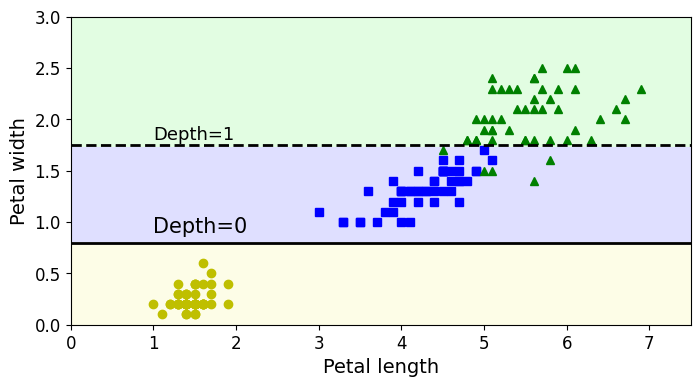

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

**Task 3d**: Describe how the new decision tree is different from the <br>
one before.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 3d answer: This tree only puts decison boundries on the petal width axis and complelty ignores the petal length feature.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

# Regression Trees

In this subsection, we will be working with a regression task. <br>
**Notice that the dataset below is different**. Here we are using a  <br>
**training set generated by a quadratic function with the addition of** <br>
**some random noise**.

In [ ]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

### Task 4
Similar to what you've done above, create a [decision tree regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) <br>
with the following hyperparameters:
  - `max_depth=2`
  - `random_state=42`

Fit it to `X`, `y`.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

Below, you'll see the difference in the prediction for an increased <br>
value of the ```max_depth``` parameter. What can you say about the <br> results?

**Again, the important thing is to understand the plots but not** <br>
**necessarilly all of the code**

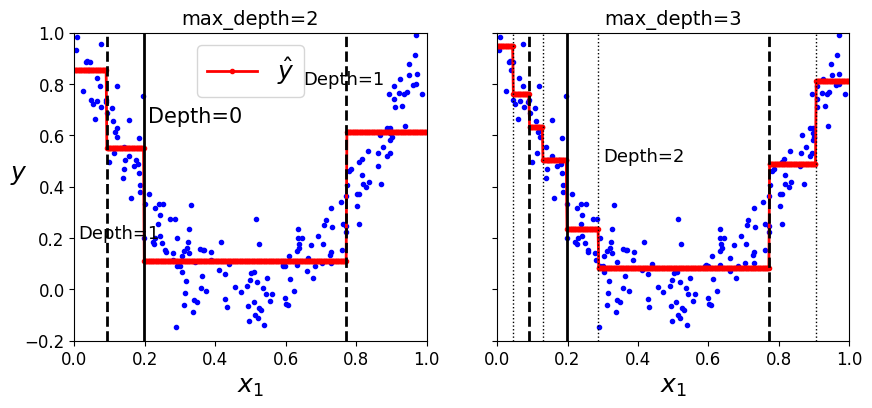

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

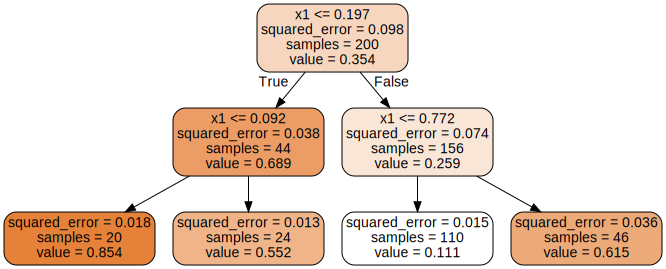

In [ ]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

## Restricting the Tree with `min_samples_leaf`

Here we are restricting the tree to `min_samples_leaf=10`. You can read <br> about it in [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) but basically it is adding the requirement <br>
that, before we end a branch, we need **10 data points** that fit **each side** of <br>
the final decision boundary.

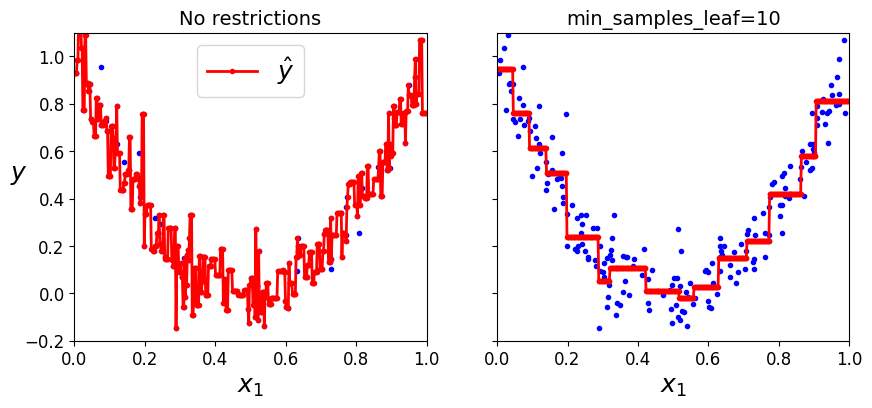

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

### Task 5

Discuss the effect of the restrictions on the regression results.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 5 answer: Restricting the tree results in lesser depth in the decision tree. Ultimately, this prevents overfitting as, without restricton, the tree will continue to partition the data until nearly every data point has it's own unique branch, which will not generalize to new data. Restricting the tree allows for a more generalized decision path which may not be as accurate when handling the training data, however, will be far more applicible to unseen data.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above this

# Random Forests

In this exercise you will be using the [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset. You can <br>
see a plot below. Basically, the tool generates fake data of two inter- <br>
leaving half-circles or "moons".


In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

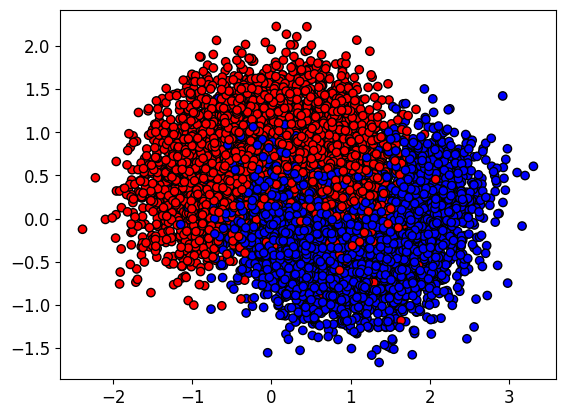

In [ ]:
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors="k");

Here we use train_test_split to split our fake data into 20% test and <br>
80% train data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

8000

In [ ]:
tree_moons = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')
tree_moons.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_moons = tree_moons.predict(X_test)
accuracy_score(y_test, y_pred_moons)

0.8695

The decision tree trained with all data has an accuracy as shown above. <br>
Now we will build a forest consisting of trees.

We will be building 100 `DecisionTreeClassifier`s. <br>
First we do a train-test-split to get training and test data.

As you can see, the training data has a size of 8000 instances. <br>
Let's generate 1000 subsets (mini-sets) of `X_train`, each containing <br>
100 instances selected randomly. You may have noticed that that's more
<br>
than 8000. We'll be reusing multiple datapoints.

Then we will train a separate tree on each of the mini-sets.

## Task 6

Grow a forest.<br>
You will have to get the following done, the way you implement it is <br>
your choice:

- Split `X_train` into 1000 subsets, each containing 100 instances <br> selected randomly. You can use sklearn's [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) for this.
- Train one [Decision Tree](https://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset. The hyperparameter values <br>
below work well:
```python
class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best'
```
You might need `from sklearn.base import clone`. To clone the tree 1000 <br> times.
- Calculate the accuracy on the test data `X_test`, `y_test` for each <br> tree. What is the mean accuracy?
- Build a forest: For each test set instance, generate the predictions <br> of the 1,000 Decision Trees, and keep only the most frequent <br> prediction (you can use SciPy's `scipy.stats.mode()` function for <br>
this). This gives you _majority-vote predictions_ over the test set. <br>
What is the accuracy of your forest? You should get a slightly better <br> accuracy than the one tree trained on all training data.


If you struggle with this task for too long, then you can find the solution [here](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb) <br>
under 8 (bottom of the notebook).

**In order you should**:
- Attempt to solve this as a group by looking up code documentation
- Raise your hand and ask for help
- Check the official book solutions only for parts of the task you are <br> struggling with
- Look at, understand, and try to replicate the code from the solution

**Do NOT directly copy the entire solution into this notebook.**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from scipy.stats import mode


n_trees = 1000
n_instances = 100
mini_sets = []

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
rs = ShuffleSplit(n_splits=n_trees, train_size=0.0125, random_state=42)

tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                     max_features=None, max_leaf_nodes=17,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0,
                     random_state=42, splitter='best')

accuracy_scores = np.empty(1000)

all_predictions = {}

for i, (train,test) in enumerate(rs.split(X_train,y_train)):
  this_tree = clone(tree)
  this_tree.fit(X_train[train],y_train[train])
  this_prediction = this_tree.predict(X_test)
  accuracy_scores[i] = accuracy_score(y_test, this_prediction)

  for j in range(len(this_prediction)):
    if j in all_predictions:
      all_predictions[j].append(this_prediction[j])
    else:
      all_predictions[j] = [this_prediction[j]]


forest_prediction = np.empty(2000)
for k in all_predictions:
  forest_prediction[k] = mode(all_predictions[k])[0].astype(int)

forest_accuracy = accuracy_score(y_test, forest_prediction)

avg_tree_accuracy = sum(accuracy_scores) / n_trees

print(f"forest accuracy: {forest_accuracy}\naverage tree accuracy: {avg_tree_accuracy}")





forest accuracy: 0.872
average tree accuracy: 0.8054710000000004


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this